<a href="https://colab.research.google.com/github/crisdavid3335/analytics_with_KERAS/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de fraudes con tarjetas de crédito
<br>
<h2> Contexto </h2>
<p align='justify'>Es importante que las empresas de tarjetas de crédito sean capaces de reconocer las transacciones fraudulentas con tarjetas de crédito para que no se cobre a los clientes por artículos que no han comprado.</p>

<h2>Contenido</h2>
<p align='justify'>El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeas.
Este conjunto de datos presenta transacciones ocurridas en dos días, donde tenemos 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172% de todas las transacciones.</p>

In [1]:
# Vamos a importar las librerías necesarias
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from keras import layers
from keras.utils.vis_utils import plot_model
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargamos los datos
data = pd.read_csv('/content/drive/MyDrive/Proyectos/Imbalanced classification: credit card fraud detection/creditcard.csv')

# Modificación para visualización
pd.options.display.max_columns = 50

# Revisamos los datos
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
# Generamos los conjuntos de caracteristicas y objetivos
features = data.columns.to_list()[:-1]
targets = data.columns.to_list()[-1]

X = data[features].copy()
y = data[targets].copy()

In [4]:
# Generamos un conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.3, 
                                                  shuffle=True,
                                                  random_state=0)

In [5]:
# Podemos observar el desbalance de los datos
print('='*50)
print('Desbalance en los datos de entrenamiento\n', y_train.value_counts())
print('='*50)
print('Desbalance en los datos de validación\n', y_val.value_counts())
print('='*50)

Desbalance en los datos de entrenamiento
 0    199019
1       345
Name: Class, dtype: int64
Desbalance en los datos de validación
 0    85296
1      147
Name: Class, dtype: int64


In [6]:
# Normalizamos los datos
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_val_sc = sc.transform(X_val)

In [7]:
# Vamos a construir el modelo

# Capa de entrada
input = keras.Input(shape=(X_train.shape[1]))

# Capas ocultas
layer_1 = layers.Dense(256, activation='relu')(input)
layer_2 = layers.Dense(256, activation='relu')(layer_1)
layer_3 = layers.Dropout(1/3)(layer_2)
layer_4 = layers.Dense(256, activation='relu')(layer_3)
layer_5 = layers.Dropout(1/3)(layer_4)

# Capa de salida 
output = layers.Dense(1, activation='sigmoid')(layer_5)

# Construcción del modelo
model = keras.Model(inputs=input, outputs=output)

# Imprimimos el resumen del modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257   

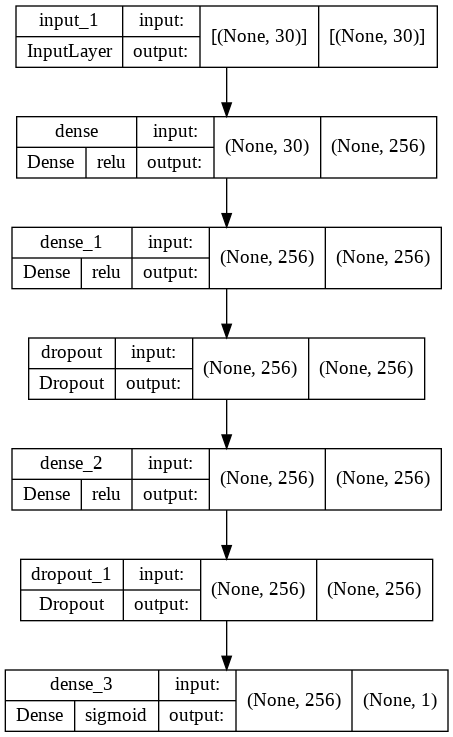

In [8]:
# Imprimimos el esquema del modelo
plot_model(model, show_layer_activations=True, show_shapes=True)

In [9]:
# Vamos a utilizar diferentes metricas
metrics = [keras.metrics.FalseNegatives(name='fn'), 
           keras.metrics.FalsePositives(name='fp'), 
           keras.metrics.TrueNegatives(name='tn'),
           keras.metrics.TruePositives(name='tp'),
           keras.metrics.Precision(name='precision'),
           keras.metrics.Recall(name='recall')]

# Se compila el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), 
              loss='binary_crossentropy', 
              metrics=metrics)

# Debido al desbalance podemos sobremuestrear los datos, 
# submuestrear los datos (con la librería imbalanced-learn)
# keras posee su propia opción para trabajar con el balanceo de datos
# Calculamos el desbalance de los datos
balance_1 = np.unique(y_train, return_counts=True)[1][1]/len(y_train)
balance_0 = np.unique(y_train, return_counts=True)[1][0]/len(y_train)

# Se guarda el desbalance en un dicciónario
class_weight = {0: balance_0, 1: balance_1}

# Configuramos una parada temprana
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  mode='auto',
                                                  patience=15, 
                                                  verbose=0,
                                                  restore_best_weights=True)

# Vamos a entrenar el modelo
model.fit(X_train, y_train, 
          batch_size=512, 
          epochs=150, 
          verbose=1,
          callbacks = [early_stopping],  
          validation_data=(X_val, y_val), 
          class_weight=class_weight)

Epoch 1/150
390/390 [==============================] - 20s 41ms/step - loss: 18.1159 - fn: 344.0000 - fp: 347.0000 - tn: 198672.0000 - tp: 1.0000 - precision: 0.0029 - recall: 0.0029 - val_loss: 889.6102 - val_fn: 147.0000 - val_fp: 0.0000e+00 - val_tn: 85296.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/150
390/390 [==============================] - 10s 25ms/step - loss: 1.8864 - fn: 345.0000 - fp: 45.0000 - tn: 198974.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 398.0175 - val_fn: 147.0000 - val_fp: 0.0000e+00 - val_tn: 85296.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/150
390/390 [==============================] - 8s 20ms/step - loss: 1.0928 - fn: 345.0000 - fp: 123.0000 - tn: 198896.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 64.8688 - val_fn: 147.0000 - val_fp: 0.0000e+00 - val_tn: 85296.0000 - val_tp: 0.0000e+00 - val_precision: 

In [10]:
# Realizamos las predicciones del conjunto de validación
y_hat = model.predict(X_train)
y_hat = np.where(y_hat >= 0.1, 1, 0)

# Vamos a evaluar el modelo
f1_ = f1_score(y_train, y_hat)
jcc_ = jaccard_score(y_train, y_hat)
aps_ = average_precision_score(y_train, y_hat)

print('='*70)
print('La puntuación F1 es: %.5f' % f1_)
print('='*70)
print('La puntuación Jaccard es: %.5f' % jcc_)
print('='*70)
print('El área bajo la curva de precisión-recuperaciónes es: %.5f' % aps_)
print('='*70)

La puntuación F1 es: 0.00000
La puntuación Jaccard es: 0.00000
El área bajo la curva de precisión-recuperaciónes es: 0.00173


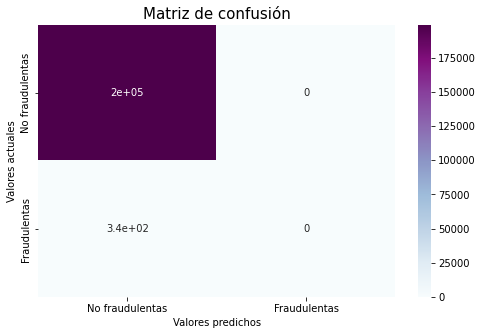

In [11]:
# Graficar la matriz de confución
c_matr = confusion_matrix(y_train, y_hat)

plt.figure(figsize=(8, 5))
ax = sns.heatmap(c_matr, annot=True, cmap='BuPu')

# Ajuste de los titulos
ax.set_title('Matriz de confusión', fontsize=15)
ax.set_xlabel('Valores predichos', fontsize=10)
ax.set_ylabel('Valores actuales', fontsize=10)

# Ajuste de las etiquetas
ax.xaxis.set_ticklabels(['No fraudulentas', 'Fraudulentas'])
ax.yaxis.set_ticklabels(['No fraudulentas', 'Fraudulentas'])
plt.show()